INTRODUCTION
In this study, "the relationship between credit card usage and three pivotal categories—consumer price expectations, intention to spend on durable goods, and actual spending on durable goods—" is examined. Official websites like Google Trends and the Central Bank of the Republic of Turkey (CBRT) are the source of the data. 

There are two parts that the investigation takes. First, we examine the relationship between the previously specified categories and the data about some related keywords from Google Trends. Then, using a variety of methods, time series regression models are created for every category. We want to reveal a model that explains the credit card usage through taking into account elements like residual analysis and the significance of coefficients.

Python Script:
First we imported required libraries. 

In [309]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_correlation(file1_name, file2_name):
    try:
        df1 = pd.read_excel(file1_name)
        df2 = pd.read_excel(file2_name)
        
        column2_file1 = df1.iloc[:, 1]
        column2_file2 = df2.iloc[:, 1]
        
        correlation = column2_file1.corr(column2_file2)
        
        return correlation
    except Exception as e:
        print(f"Error processing files: {str(e)}")
        return None

Firstly, line graph of the card usage in Turkiye is plotted. There is an obvious positive trend:

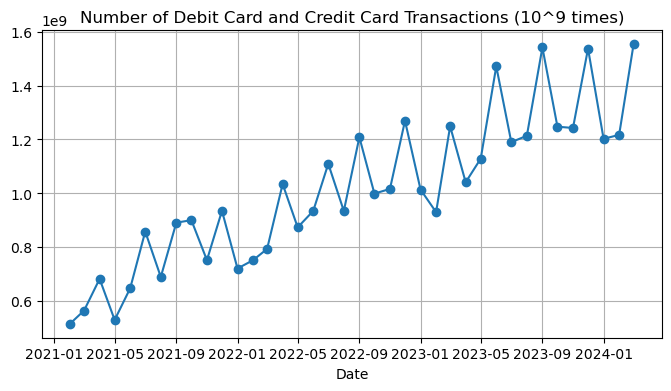

In [310]:
card = pd.read_excel("card.xlsx", parse_dates=[0])  

plt.figure(figsize=(8, 4))
plt.plot(card.iloc[:, 0], card.iloc[:, 1], marker='o', linestyle='-')
plt.xlabel('Date')  
plt.title('Number of Debit Card and Credit Card Transactions (10^9 times)')
plt.grid(True)
plt.show()

The first category that will be analysed is "Balance Sheet of Deposit Banks (Thousand TL)(Monthly)"

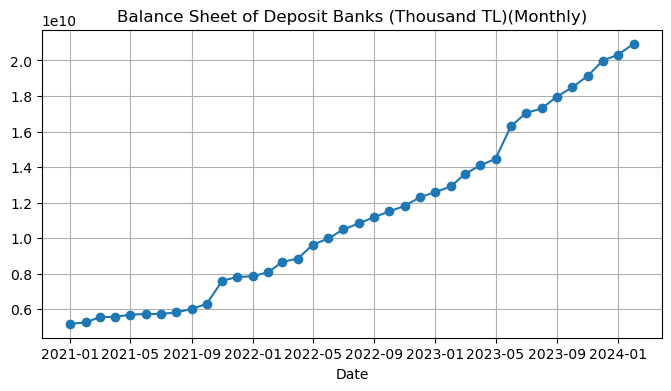

In [311]:
bank = pd.read_excel("bank_revenue.xlsx", parse_dates=[0])  

plt.figure(figsize=(8, 4))
plt.plot(bank.iloc[:, 0], bank.iloc[:, 1], marker='o', linestyle='-')
plt.xlabel('Date')  
plt.title('Balance Sheet of Deposit Banks (Thousand TL)(Monthly)')
plt.grid(True)
plt.show()

The second category that will be analysed is "Expectation percentage in the surveys regarding the change in consumer prices"

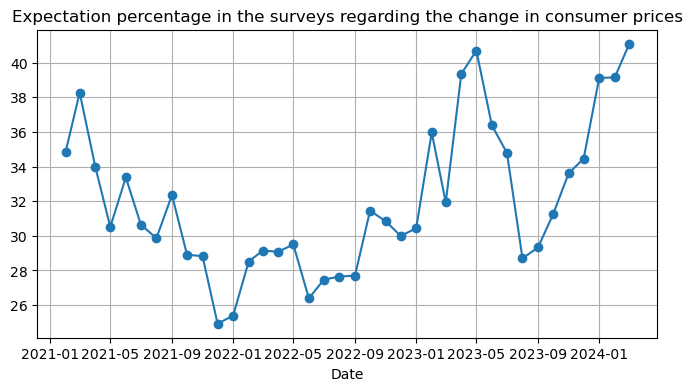

In [312]:
survey = pd.read_excel("survey.xlsx", parse_dates=[0])  

plt.figure(figsize=(8, 4))
plt.plot(survey.iloc[:, 0], survey.iloc[:, 1], marker='o', linestyle='-')
plt.xlabel('Date')  
plt.title('Expectation percentage in the surveys regarding the change in consumer prices')
plt.grid(True)
plt.show()

The third category that will be analysed is "Thought/possibility of spending on durable consumer goods (car, white goods)"

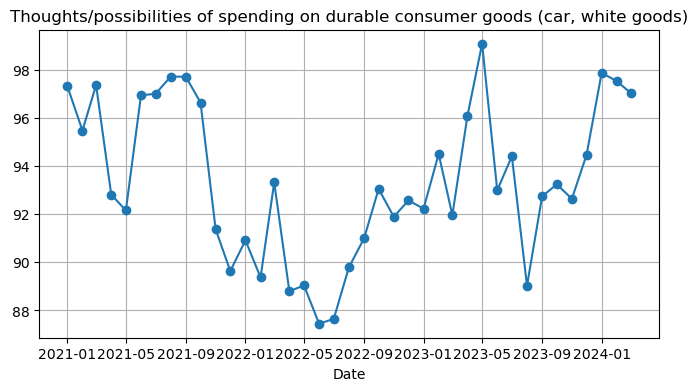

In [313]:
spend_possibility = pd.read_excel("EVDS-4.xlsx", parse_dates=[0])  

plt.figure(figsize=(8, 4))
plt.plot(spend_possibility.iloc[:, 0], spend_possibility.iloc[:, 1], marker='o', linestyle='-')
plt.xlabel('Date')  
plt.title('Thoughts/possibilities of spending on durable consumer goods (car, white goods)')
plt.grid(True)
plt.show()

In [314]:
card = "card.xlsx"
survey = "survey.xlsx"
bank = "bank_revenue.xlsx"
spend_possibility = "EVDS-4.xlsx"

correlation1 = calculate_correlation(bank, survey)
correlation2 = calculate_correlation(bank, spend_possibility)
correlation3 = calculate_correlation(survey, spend_possibility)
print(correlation1)
print(correlation2)
print(correlation3)

0.45914644339328337
6.189729108783601e-06
0.5449238286447758


Here, all the correlations are relatively low. Especially, the second correlation is almost zero. Finding lower correlations (below 0.5) has been tried, however due to the restriction about data sources (only Central Bank) another dataframes could not be found.

PART1 
GOOGLE TRENDS

Turkish words "Banka", "Zam" and "Sahibinden" (Online marketplace for cars, flats etc.) were chosen.

In [315]:
word_banka = "banka_word.xlsx"
word_zam = "word_zam.xlsx"
word_sahibinden = "word_sahibinden.xlsx"

In [316]:
correlation4 = calculate_correlation(word_banka, bank)
correlation5 = calculate_correlation(word_zam, survey)
correlation6 = calculate_correlation(word_sahibinden, spend_possibility)
print(correlation4)
print(correlation5)
print(correlation6)

0.7987906040746326
0.2597863789245446
0.3797381670130357


The first correlation is high. It can be said that, when people search for banks they tned to be active customers. That might cause the revenues of banks to increase

The second and third one are interestingly low. Both of the datas are from surveys that were conducted on customers. Realiablity of the surveys might be questioned.

Now, Google Trends data will be analyzed visually:

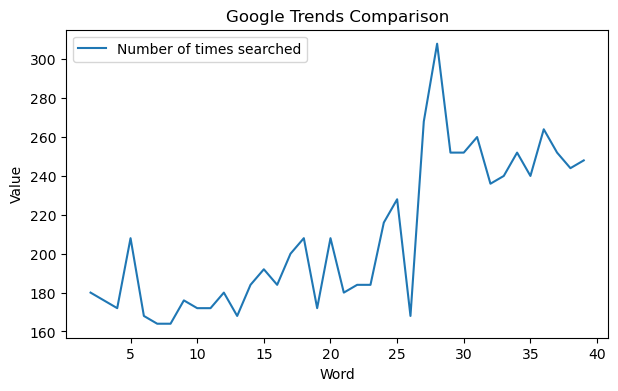

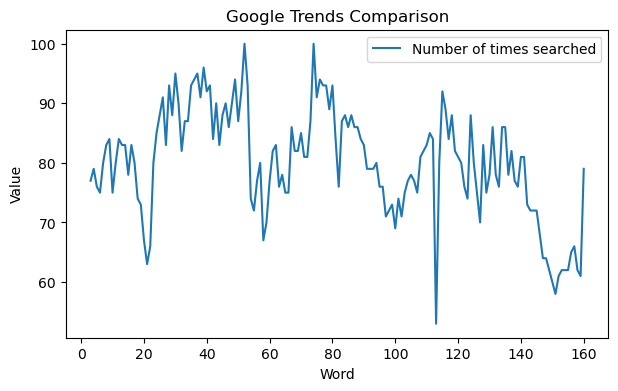

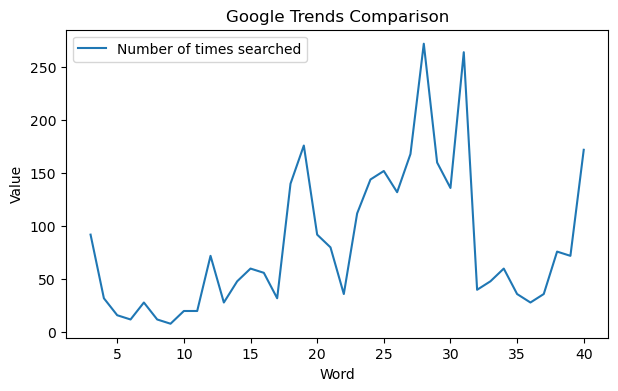

In [317]:
import matplotlib.pyplot as plt

def plot_time_series(file1_name):
    try:
        df1 = pd.read_excel(file1_name, header=None)
        time_series1 = df1.iloc[:, 1]
        
        plt.figure(figsize=(7, 4))
        plt.plot(time_series1, label='Number of times searched')
        plt.xlabel('Word')
        plt.ylabel('Value')
        plt.title('Google Trends Comparison')
        plt.legend()

        plt.show()
    except Exception as e:
        print(f"Error plotting time series data: {str(e)}")

plot_time_series(word_banka) #bank
plot_time_series(word_sahibinden) # spend_possibility
plot_time_series(word_zam) # survey

PART 2
REGRESSION MODELS

Ordinary Least Squares, or OLS for short, is a linear regression analysis technique used to estimate a linear regression model's parameters. The objective of this approach is to reduce the total squared discrepancies between the dependent variable's observed and anticipated values.

The code snippet that is provided has model = sm.OLS(y, X).
An Ordinary Least Squares (OLS) regression model with y as the dependent variable and X as the independent variables is initialized . The model is then fitted to the data using the fit() method.

                            OLS Regression Results                            
Dep. Variable:              609061890   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     99.22
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           9.39e-12
Time:                        22:19:33   Log-Likelihood:                -745.15
No. Observations:                  37   AIC:                             1494.
Df Residuals:                      35   BIC:                             1498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.613e+08   5.83e+07      7.909      0.0

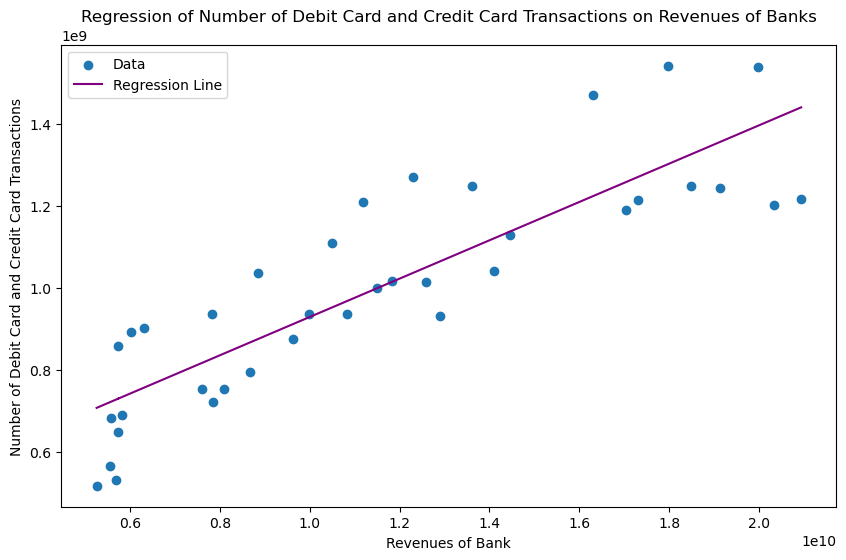

In [318]:
card_usage = pd.read_excel('card.xlsx', parse_dates=[0], index_col=0)
bank = pd.read_excel('bank_revenue.xlsx', parse_dates=[0], index_col=0)


merged_data = pd.merge(card_usage, bank, how='inner', left_index=True, right_index=True)

X = merged_data.iloc[:, 1]  # Independent variable 
y = merged_data.iloc[:, 0] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 1], y, label='Data')
plt.plot(X.iloc[:, 1], model.predict(X), color='purple', label='Regression Line')
plt.xlabel('Revenues of Bank')
plt.ylabel('Number of Debit Card and Credit Card Transactions')
plt.title('Regression of Number of Debit Card and Credit Card Transactions on Revenues of Banks')
plt.legend()
plt.show()


R-squared and Adjusted R-squared: 
The R-squared value of 0.739 indicates that approximately 73.9% of the variability in the dependent variable is explained by the independent variable(s) in the model. The adjusted R-squared value, is slightly lower at 0.732


F-statistic and Prob (F-statistic): 
The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 99.22, and the associated p-value (Prob (F-statistic)) is 9.39e-12, indicating that the regression model is statistically significant


The data of the second category will be analyzed:

                            OLS Regression Results                            
Dep. Variable:            609061890.0   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.391
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.131
Time:                        22:19:33   Log-Likelihood:                -791.22
No. Observations:                  38   AIC:                             1586.
Df Residuals:                      36   BIC:                             1590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.952e+08   3.36e+08      1.472

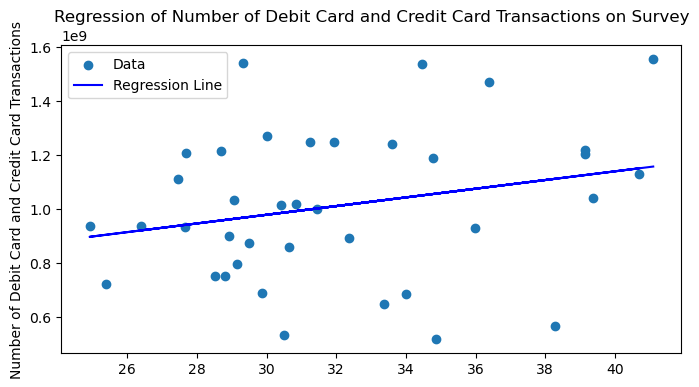

In [319]:

card_usage = pd.read_excel('card.xlsx', parse_dates=[0], index_col=0)
survey = pd.read_excel('survey.xlsx', parse_dates=[0], index_col=0)

merged_data = pd.merge(card_usage, survey, how='inner', left_index=True, right_index=True)

X = merged_data.iloc[:, 1]  # Independent variable 
y = merged_data.iloc[:, 0] 

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 4))
plt.scatter(X.iloc[:, 1], y, label='Data')
plt.plot(X.iloc[:, 1], model.predict(X), color='Blue', label='Regression Line')
plt.ylabel('Number of Debit Card and Credit Card Transactions')
plt.title('Regression of Number of Debit Card and Credit Card Transactions on Survey')
plt.legend()
plt.show()


The R-squared value of 0.062 indicates that approximately 6.2% of the variability in the dependent variable is explained by the independent variable in the model. 
Apparently, this suggests a relatively weak relationship between the two variables.

The coefficient of the independent variable (1.611e+07) implies that for each unit increase in the independent variable, there is an associated increase of 1.611e+07 units in the dependent variable, holding all other variables constant.

The p-value associated with the coefficient of the independent variable is 0.131, which is greater than the conventional significance level of 0.05. Therefore, the coefficient is not statistically significant at the 5% level. This suggests that there is insufficient evidence to conclude that the independent variable has a significant linear relationship with the dependent variable.



The data of the third category will be analyzed:

                            OLS Regression Results                            
Dep. Variable:              609061890   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                  0.006855
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.934
Time:                        22:19:33   Log-Likelihood:                -792.43
No. Observations:                  38   AIC:                             1589.
Df Residuals:                      36   BIC:                             1592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.123e+09   1.35e+09      0.831      0.4

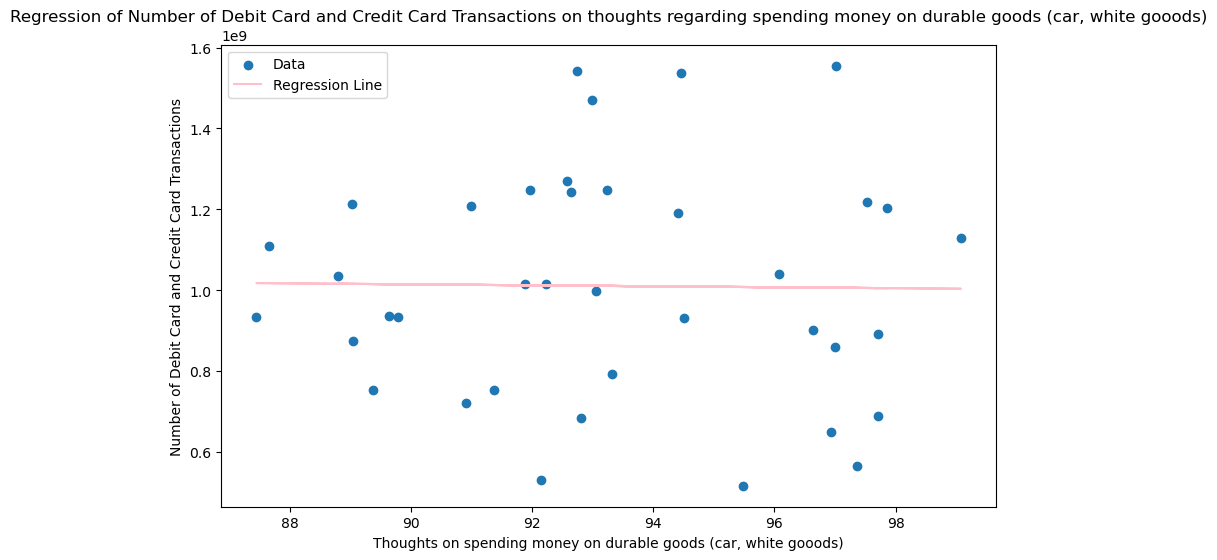

In [320]:
card_usage = pd.read_excel('card.xlsx', parse_dates=[0], index_col=0)
spend_possibility = pd.read_excel('EVDS-4.xlsx', parse_dates=[0], index_col=0)

merged_data = pd.merge(card_usage, spend_possibility, how='inner', left_index=True, right_index=True)

X = merged_data.iloc[:, 1]  # Independent variable 
y = merged_data.iloc[:, 0] 

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 1], y, label='Data')
plt.plot(X.iloc[:, 1], model.predict(X), color='Pink', label='Regression Line')
plt.xlabel('Thoughts on spending money on durable goods (car, white gooods)')
plt.ylabel('Number of Debit Card and Credit Card Transactions')
plt.title('Regression of Number of Debit Card and Credit Card Transactions on thoughts regarding spending money on durable goods (car, white gooods)')
plt.legend()
plt.show()


Similarly, there is weak relation/no relation.
Thus, the first graph has the highest R-squared value.